<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

A = np.random.randn(3, 3)
A

array([[-1.28914841, -1.59144862,  0.96646228],
       [ 0.07486122,  2.0018418 ,  0.53884601],
       [ 1.54636461, -1.08581504, -1.19177902]])

In [3]:
value, vector = np.linalg.eig(A)
value

array([-2.51122946,  0.62936133,  1.40278249])

In [ ]:
u, sig, v_t = np.linalg.svd(A, full_matrices=False)

print("u  :" + str(u.shape))
print("sig:" + str(sig.shape))
print("v_t:" + str(v_t.shape))

u  :(5, 3)
sig:(3,)
v_t:(3, 3)


In [ ]:
sig

array([2.62963933, 1.79075307, 1.07482575])

In [ ]:
s = np.diag(sig)
s

array([[2.62963933, 0.        , 0.        ],
       [0.        , 1.79075307, 0.        ],
       [0.        , 0.        , 1.07482575]])

In [ ]:
u_s = np.matmul(u, s)
u_s

array([[ 0.85242248, -1.03904655, -0.25107303],
       [-1.64197585,  0.71426867,  0.13424347],
       [ 0.53874287,  0.85231631, -0.88159755],
       [-1.5074254 , -0.91611666, -0.3221099 ],
       [-0.96421938, -0.22646473, -0.43957069]])

In [ ]:
AA = np.matmul(u_s, v_t)
AA

array([[ 0.61615872, -0.37768342, -1.16059603],
       [-0.19912678,  1.08758956,  1.41484387],
       [-1.23985771,  0.06429074, -0.50251444],
       [ 1.01559606,  1.45015157,  0.28457145],
       [ 0.2359315 ,  1.03902043,  0.1974856 ]])

In [ ]:
A_t = np.transpose(A)
A_t



array([[ 0.61615872, -0.19912678, -1.23985771,  1.01559606,  0.2359315 ],
       [-0.37768342,  1.08758956,  0.06429074,  1.45015157,  1.03902043],
       [-1.16059603,  1.41484387, -0.50251444,  0.28457145,  0.1974856 ]])

In [ ]:

AAt = np.matmul(A, A_t)
AtA = np.matmul(A_t, A)

print(AAt)
print(AtA)

[[ 1.86927948 -2.17552043 -0.20501442 -0.25220233 -0.47625054]
 [-2.17552043  3.22428572 -0.39416866  1.77756152  1.36245878]
 [-0.20501442 -0.39416866  1.79390122 -1.30896455 -0.32496146]
 [-0.25220233  1.77756152 -1.30896455  3.21535585  1.80254697]
 [-0.47625054  1.36245878 -0.32496146  1.80254697  1.17422768]]
[[ 3.04364923  1.18891335 -0.03819555]
 [ 1.18891335  4.51213216  2.56266359]
 [-0.03819555  2.56266359  3.72126857]]


In [ ]:
u_eig, u_vec = np.linalg.eig(AAt)
u_eig, u_vec

(array([6.91500299e+00, 3.20679656e+00, 1.15525040e+00, 2.76945810e-16,
        5.47768286e-17]),
 array([[ 0.32415947, -0.58022882, -0.23359417,  0.41817721,  0.05414831],
        [-0.62441105,  0.39886497,  0.12489789,  0.30447176, -0.04887306],
        [ 0.20487329,  0.47595412, -0.8202237 , -0.17963891, -0.23833087],
        [-0.57324416, -0.51158179, -0.29968569, -0.55813832, -0.52277514],
        [-0.36667362, -0.12646341, -0.40896925,  0.62340697,  0.81522017]]))

In [ ]:
v_eig, v_vec = np.linalg.eig(AtA)
v_eig, v_vec

(array([6.91500299, 3.20679656, 1.1552504 ]),
 array([[-0.22765003, -0.88032812,  0.41617047],
        [-0.76080146, -0.10594736, -0.64027829],
        [-0.60774715,  0.46238247,  0.645636  ]]))

In [ ]:
from sklearn.decomposition import TruncatedSVD

my_svd = TruncatedSVD(n_components=2)

my_svd.fit(A)

TruncatedSVD()

In [ ]:
print(my_svd.singular_values_)

[2.62963933 1.79075307]


In [ ]:
A_2 = my_svd.transform(A)
A_2

array([[-0.85242248,  1.03904655],
       [ 1.64197585, -0.71426867],
       [-0.53874287, -0.85231631],
       [ 1.5074254 ,  0.91611666],
       [ 0.96421938,  0.22646473]])

In [ ]:
print( s[:2,:2] )
A_3 = np.matmul(u, s[:,:2])
print(A_3)
A_4 = np.matmul(A_3, v_t[:2,:])
print(A_4)

[[2.62963933 0.        ]
 [0.         1.79075307]]
[[ 0.85242248 -1.03904655]
 [-1.64197585  0.71426867]
 [ 0.53874287  0.85231631]
 [-1.5074254  -0.91611666]
 [-0.96421938 -0.22646473]]
[[ 0.7206479  -0.53844003 -0.99849425]
 [-0.25499495  1.17354275  1.32817145]
 [-0.87296284 -0.50017703  0.06667668]
 [ 1.14964869  1.2439116   0.4925372 ]
 [ 0.41886784  0.75757286  0.48128826]]


In [ ]:
 from sklearn.datasets import load_iris
 from sklearn.decomposition import TruncatedSVD 

In [ ]:
 iris = load_iris()
 X = iris.data
 Y = iris.target
 X[:10] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
SVD_2=TruncatedSVD(2)

In [ ]:
 X_truncated = SVD_2.fit_transform(X)
 X_truncated[:10] 

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018],
       [6.47759822, 2.32464996],
       [5.5159752 , 2.07090423],
       [5.85092859, 2.14807482],
       [5.15891972, 1.77506408],
       [5.64500117, 1.99000106]])

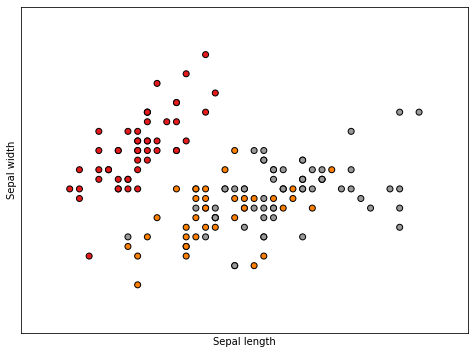

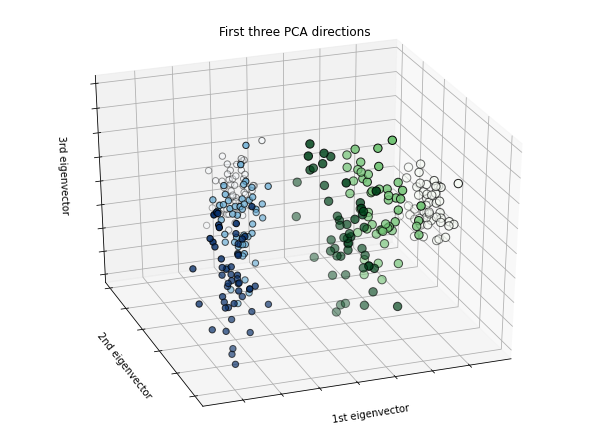

In [ ]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# TruncatedSVD is added by aidentify

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD 

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced1 = PCA(n_components=3).fit_transform(iris.data)
X_reduced2 = TruncatedSVD(n_components=3).fit_transform(iris.data)

ax.scatter(
    X_reduced1[:, 0],
    X_reduced1[:, 1],
    X_reduced1[:, 2],
    c=y,
    cmap='Greens',
    edgecolor="k",
    s=70,
)

ax.scatter(
    X_reduced2[:, 0],
    X_reduced2[:, 1],
    X_reduced2[:, 2],
    c=y,
    cmap='Blues',
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()